In [1]:
%load_ext nb_black
%matplotlib notebook

<IPython.core.display.Javascript object>

In [119]:
import pandas as pd
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [80]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("../data/processed/heart_cleveland_upload.csv")
x_input = df.drop(columns=["condition"])
target = df["condition"]
x_input

,age,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,sex_0,...,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2
0,69,160,234,1,131,0,0.1,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,69,140,239,0,151,0,1.8,0,2,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,66,150,226,0,114,0,2.6,2,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,65,138,282,1,174,0,1.4,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,64,110,211,0,144,1,1.8,1,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,152,223,0,181,0,0.0,0,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
293,39,118,219,0,140,0,1.2,1,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
294,35,120,198,0,130,1,1.6,1,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
295,35,138,183,0,182,0,1.4,0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_input, target, test_size=0.85)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


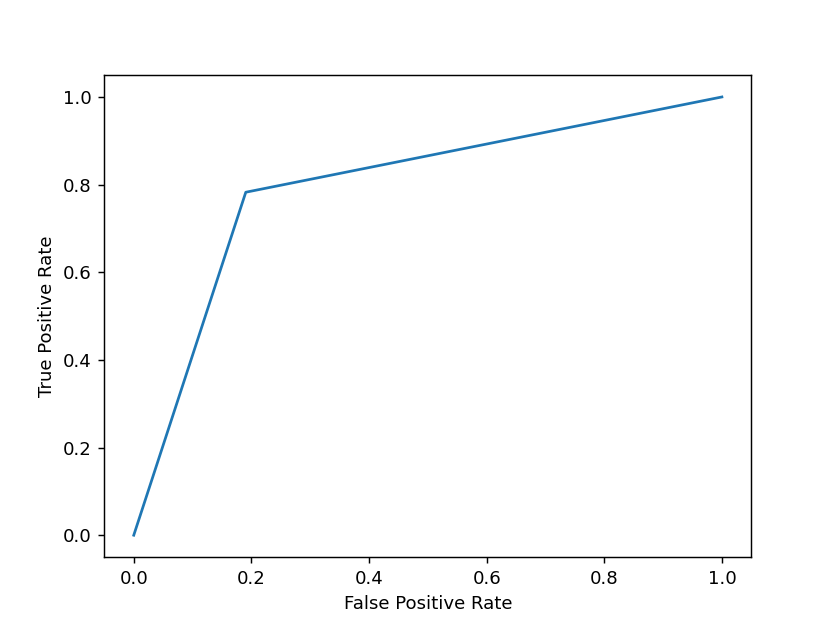

0.8

<IPython.core.display.Javascript object>

In [121]:
cv = StratifiedKFold(n_splits=5)
model = LogisticRegressionCV(penalty="l2", cv=cv, max_iter=10000, tol=0.01)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
plt.figure()
plot_roc_curve(y_train, y_pred_train)
f1_score(y_train, y_pred_train)

<IPython.core.display.Javascript object>


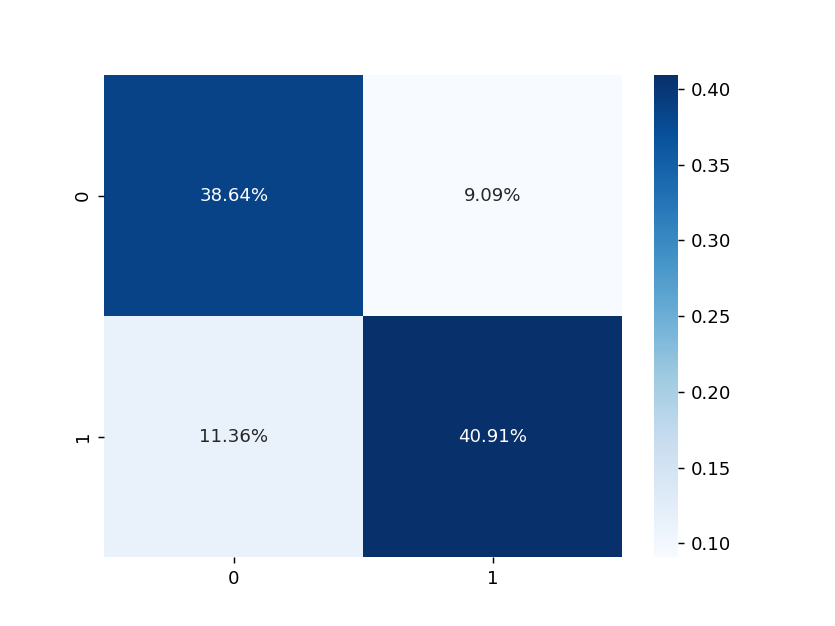

<AxesSubplot:>

<IPython.core.display.Javascript object>

In [123]:
plt.figure()
sns.heatmap(
    confusion_matrix(y_train, y_pred_train, normalize="all"),
    annot=True,
    fmt=".2%",
    cmap="Blues",
)

<IPython.core.display.Javascript object>


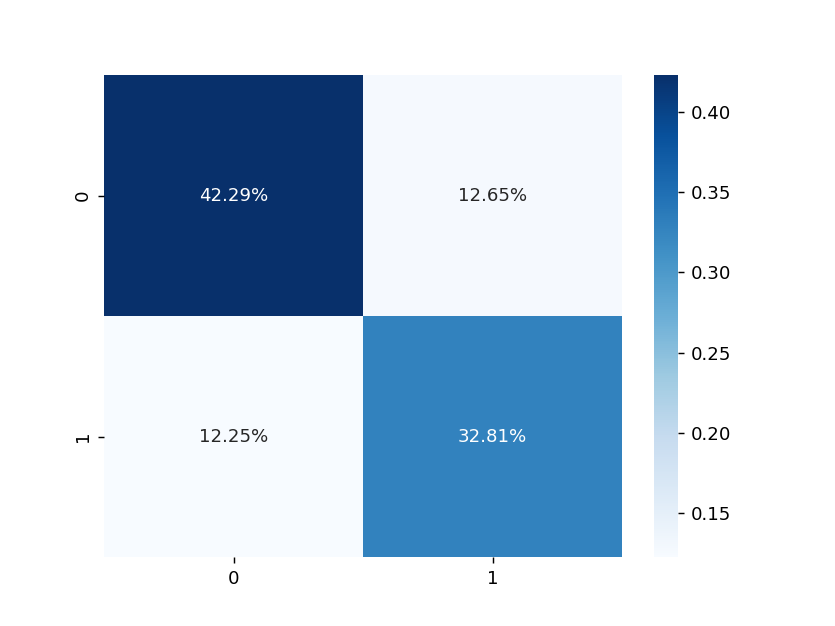

0.7248908296943233

<IPython.core.display.Javascript object>

In [126]:
plt.figure()
y_pred_test = model.predict(x_test)
sns.heatmap(
    confusion_matrix(y_test, y_pred_test, normalize="all"),
    annot=True,
    fmt=".2%",
    cmap="Blues",
)
f1_score(y_test, y_pred_test)